In [46]:
%matplotlib inline

import sys
from lumapi import FDTD
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [47]:
caminho = [r"C:\Users\gson5\Downloads\ERICK TRALHAS\FOTÔNICA\PROJETO\3D\forward_20.lsf",
           r"C:\Users\gson5\Downloads\ERICK TRALHAS\FOTÔNICA\PROJETO\3D\forward_0.lsf"]

# 0 otimizado
# 1 não otimizado

opt = 1

In [48]:
fdtd = FDTD()
fdtd.load(caminho[opt])

In [49]:
fdtd.select("opt_fields_index")
fdtd.delete()

fdtd.select("fom_mode_exp")
fdtd.delete()

fdtd.select("fom_mode_src")
fdtd.delete()

fdtd.select("opt_fields_index")
fdtd.delete()

fdtd.select("opt_fields")
fdtd.delete()

fdtd.select("fom")
fdtd.delete()

fdtd.select("FDTD")
fdtd.delete()

fdtd.select("source")
fdtd.delete()

In [50]:
um = 1e-6
nm = 1e-9

### SIM PARAMS
size_x=5e-6
size_y=5e-6
size_z=1.2e-6

number_of_points = 100

startWvg = 1530*nm
stopWvg = 1560*nm


In [51]:
fdtd.select("FDTD")
fdtd.delete()

fdtd.addfdtd()
fdtd.set('dimension','3D')
fdtd.set('mesh accuracy',2)
fdtd.set('x',0)
fdtd.set('y',0)
fdtd.set('z',0)
fdtd.set('x span',size_x)
fdtd.set('y span',size_y)
fdtd.set('z span',size_z)
fdtd.set('index', 1.4442)
fdtd.set('force symmetric y mesh',1)
fdtd.set("global monitor frequency points", number_of_points)
fdtd.set("global source wavelength start", startWvg)
fdtd.set("global source wavelength stop", stopWvg)
# fdtd.set('force symmetric z mesh',1)
# fdtd.set('z min bc','Symmetric')
fdtd.set('y min bc','Anti-Symmetric')
fdtd.set('pml layers',12)

In [52]:
for i in range(4):
    fdtd.select(f"FDTD::ports::port{i+1}")
    fdtd.delete()

fdtd.addport()
fdtd.set("name", "port1")
fdtd.set("mode selection", 2)
fdtd.set("injection axis", "x")
fdtd.set("direction", "forward")
fdtd.set("x", -size_x/2.1)
fdtd.set("y", 0)
fdtd.set("x span", size_x/2)
fdtd.set("y span", size_y/2)
fdtd.set("z span", size_z/2)

fdtd.addport()
fdtd.set("name", "port2")
fdtd.set("mode selection", 2)
fdtd.set("injection axis", "x")
fdtd.set("direction", "backward")
fdtd.set("x", size_x/2.1)
fdtd.set("y", 0)
fdtd.set("x span", size_x/2)
fdtd.set("y span", size_y/2)
fdtd.set("z span", size_z/2)

"""
fdtd.addport()
fdtd.set("name", "port3")
fdtd.set("mode selection", 2)
fdtd.set("injection axis", "y")
fdtd.set("direction", "backward")
fdtd.set("x", 0)
fdtd.set("y", size_y/2.1)
fdtd.set("x span", size_x/2)
fdtd.set("y span", size_y/2)
fdtd.set("z span", size_z/2)

fdtd.addport()
fdtd.set("name", "port4")
fdtd.set("mode selection", 2)
fdtd.set("injection axis", "y")
fdtd.set("direction", "forward")
fdtd.set("x", 0)
fdtd.set("y", -size_y/2.1)
fdtd.set("x span", size_x/2)
fdtd.set("y span", size_y/2)
fdtd.set("z span", size_z/2)
"""

'\nfdtd.addport()\nfdtd.set("name", "port3")\nfdtd.set("mode selection", 2)\nfdtd.set("injection axis", "y")\nfdtd.set("direction", "backward")\nfdtd.set("x", 0)\nfdtd.set("y", size_y/2.1)\nfdtd.set("x span", size_x/2)\nfdtd.set("y span", size_y/2)\nfdtd.set("z span", size_z/2)\n\nfdtd.addport()\nfdtd.set("name", "port4")\nfdtd.set("mode selection", 2)\nfdtd.set("injection axis", "y")\nfdtd.set("direction", "forward")\nfdtd.set("x", 0)\nfdtd.set("y", -size_y/2.1)\nfdtd.set("x span", size_x/2)\nfdtd.set("y span", size_y/2)\nfdtd.set("z span", size_z/2)\n'

In [53]:
fdtd.select("perfil")
fdtd.delete()

fdtd.addprofile()
fdtd.set("name", "perfil")
fdtd.set("x", 0)
fdtd.set("y", 0)
fdtd.set("z", 0)
fdtd.set("x span", size_x)
fdtd.set("y span", size_y)


In [54]:
if(opt == 0):
    fdtd.save(r"C:\Users\gson5\Downloads\ERICK TRALHAS\FOTÔNICA\PROJETO\SIMULATION 3D")
elif(opt == 1):
    fdtd.save(r"C:\Users\gson5\Downloads\ERICK TRALHAS\FOTÔNICA\PROJETO\SIMULATION 3D NÃO OTIMIZADO")

In [55]:
fdtd.run()

## Field Profile

In [56]:
# Field profile
E = fdtd.getresult("perfil", "E")

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um
z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

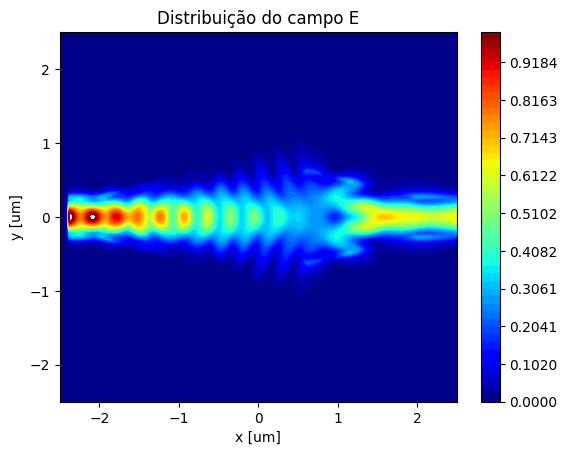

In [57]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 50, endpoint=True)

plt.contourf(x, y, np.transpose(Emag[:,:,0]**2), v, cmap=mycmap)
plt.colorbar()

plt.title('Distribuição do campo E', fontsize=12)
plt.ylabel('y [um]', fontsize=10)
plt.xlabel('x [um]', fontsize=10)

if (opt == 0):
    plt.savefig("PERFIL DE CAMPO - FDTD 3D - OTIMIZADO")
elif(opt == 1):
    plt.savefig("PERFIL DE CAMPO - FDTD 3D - NÃO OTIMIZADO")

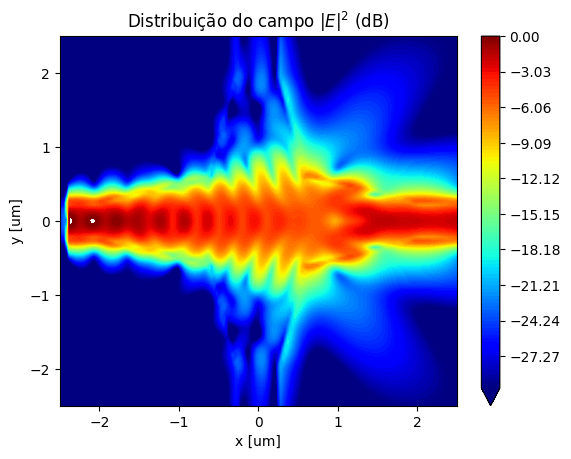

In [58]:
plt.figure()
v = np.linspace(-30, 0, 100, endpoint=True)

plt.title(r'Distribuição do campo $|E|^2$ (dB)', fontsize=12)
plt.ylabel(r'y [um]', fontsize=10)
plt.xlabel(r'x [um]', fontsize=10)

CS = plt.contourf(x, y, 10*np.log10(np.transpose(Emag[:, :,0]**2)), v, cmap=mycmap, extend='min')
plt.colorbar()

if (opt == 0):
    plt.savefig("PERFIL DE CAMPO - FDTD 3D - OTIMIZADO (dB)")
elif(opt == 1):
    plt.savefig("PERFIL DE CAMPO - FDTD 3D - NÃO OTIMIZADO (dB)")

## Transmitance

In [59]:
T1 = np.abs(fdtd.getresult("FDTD::ports::port1", "T")['T'])
T2 = np.abs(fdtd.getresult("FDTD::ports::port2", "T")['T'])

T1_dB = 10 * np.log10(T1)
T2_dB = 10 * np.log10(T2)

Lambda = fdtd.getresult("FDTD::ports::port1", "T")['lambda']

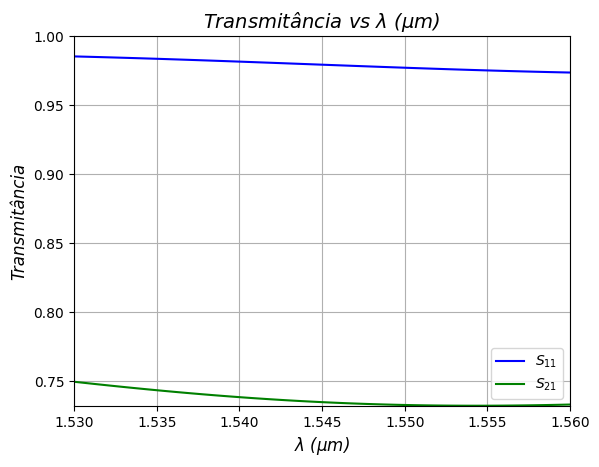

In [60]:
plt.plot(Lambda/um, T1, 'b', lw=1.5, label='$S_{11}$')
plt.plot(Lambda/um, T2, 'g', lw=1.5, label='$S_{21}$')
plt.xlabel(r'$\lambda$ ($\mu$m)', fontsize=12, fontstyle='italic')
plt.ylabel('Transmitância', fontsize=12, fontstyle='italic')
plt.title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=14, fontstyle='italic')
plt.xlim([min(Lambda/um), max(Lambda/um)])
plt.ylim([min(np.min(T1), np.min(T2)), 1])
plt.grid()
plt.legend()

if (opt == 0):
    plt.savefig("TRANSMITÂNCIA - FDTD 3D - OTIMIZADO")
elif(opt == 1):
    plt.savefig("TRANSMITÂNCIA - FDTD 3D - NÃO OTIMIZADO")

plt.show()
